## COVID-19 - IMC-SF (Inhomogeneous Multiplicative Cascade for Social Fluids)
by R.R.Rosa, R.A. Sautter & N. Joshi

LABAC-INPE-MCTIC

version 1.2 - March 30, 2020

In [0]:
#COVID-19 - IMC-SF (Inhomogeneous Multiplicative Cascade for Social Fluids) by R.R.Rosa, R.A. Sautter & N. Joshi
#LABAC-INPE-MCTIC
#version 1.2 - March 30, 2020
#This code has as input:
#(i) the general transmission factor g (0 < g < 1)
#(ii)the value of daily new confirmed cases of COVID-19: n_knb (number of cases for yesterday) and n_knt (number of cases for today)
#(the model has been validated by using the official values from WHO)
#The output is the expected range (min-max), the g(t) to be assimilated by the model and the respective expected supression factor s(g_0, g, n_knb, n_knt), 
#when there is positive derivative spike for the next day the precision of the model is 80%.

import pandas.util.testing as tm
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline


In [0]:
#set the value of g (0.0 < g < 1.0)
class fConst():
    def getF(self):
        return 0.75

day="April04" 
g0=0.55      

In [0]:
def InputValues(nkb, nKnown, f=fConst(),fn=[[2,4],[4,7],[5,10]], probAgent=[0.7,0.25,0.05]):
    '''
    InputValues 
        Numero de casos hoje - OMS.
    --------
    Parametros:
        nkb - numero de casos do dia anterior
        nKnown - numero de casos de hoje
        day - dia de amanhã para o qual o modelo irá prever
        f - fator "g" de ajuste do estagio da doenca(ponderacao geral) - Opcional
        fn - lista dos valores extremos de cada agente  - Opcional
        probAgent - lista com as probabilidade de encontrar um dado agente - Opcional
    '''
    
    if len(fn)!=len(probAgent):
        raise Exception("Fn and probAgent must have same size")
    nAgent = len(fn)
    if nAgent<1:
        raise Exception("There must be at least one agent")
    
    # Normalizando as probabilidades 
    prob = np.array(probAgent)/np.sum(probAgent)
    
    #Calculando o valor minimo do intervalo
    nMin = 0
    for i in range(nAgent):
        nMin += prob[i]*fn[i][0]
    nMin = nMin*f.getF()*nKnown
    nMin = int(nMin)
    
    #Calculando o valor maximo do intervalo
    nMax = 0
    for i in range(nAgent):
        nMax += prob[i]*fn[i][1]
    nMax = nMax*f.getF()*nKnown
    nMax = int(nMax)
    
    
    #the daily derivative
    ddmin = nMin-nKnown
    ddmax = nMax-nKnown
    
    #index of supression (isup) and supression factor (supf)
    
    
    
    g = f.getF()
    
    isup1=(1-g)**2
    isup2=(1-g0)**2
    
    if(g0) < g: 
         supfg = (g0 - g) - isup1
    #elif (g0) > 0.5:
         #supf=g0-f.getF()-isup**2
    else:
         supfg = (g0 - g) + isup2
    
    delta=(nkb-nKnown)/nKnown

    supf= (2*supfg + delta)/3
    
    return [f.getF(), day, nMin,nMax, 'supression factor:', round(supf,2)]

    #return [f.getF(), day, nMin,nMax, 'daily der (min,max:', ddmin, ddmax,'supression:', supf]
 

1. IMC Model (Rosa et al.) - Input Data for 3 Countries

In [0]:
#Country 1: Brazil
InputValues(1119, 1074)

[0.75, 'April04', 2134, 4067, 'supression factor:', -0.29]

In [0]:
#Country 2: Canada
InputValues(1112, 1673)

[0.75, 'April04', 3325, 6336, 'supression factor:', -0.29]

In [0]:
#Country 3: Australia
InputValues(150, 248)

[0.75, 'April04', 492, 939, 'supression factor:', -0.44]

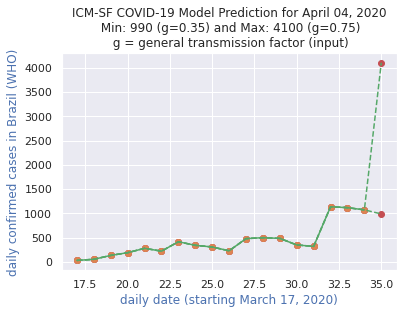

INPUT AND OUTPUT FOR APRIL 04, 2020


,Country,Transmission Factor (g0),Transmission Factor (g),Number one day before (n_kb),Number today (n_kt),Number for tomorrow (N_min),Number for tomorrow (N_max),Supression Factor (s)
0,Brazil,0.75,0.35,1119,1074,990,1900,0.30
1,Brazil,0.75,0.55,1119,1074,1899,2980,-0.40
2,Brazil,0.75,0.75,1119,1074,2979,4100,-0.30
3,Canada,0.35,0.35,1112,1673,1549,2950,0.16
4,Canada,0.35,0.55,1112,1673,2949,4650,0.02
5,Canada,0.35,0.75,1112,1673,4649,6350,-0.30
6,Australia,0.35,0.35,150,248,230,440,0.15
7,Australia,0.35,0.55,150,248,439,690,-0.40
8,Australia,0.35,0.75,150,248,689,940,-0.45


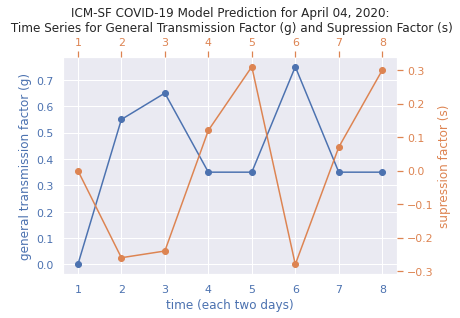

In [0]:
# Dados

x_values1=[17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
x_values2=[17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]

y_values1=[34,57,137,193,283,224,418,345,310,232,482,502,487,352,323,1138,1119, 1074, 990]
y_values2=[34,57,137,193,283,224,418,345,310,232,482,502,487,352,323,1138,1119, 1074, 4100]

y_values3=[34,57,137,193,283,224,418,345,310,232,482,502,487,352,323,1138,1119,1074]


fig=plt.figure()
ax=fig.add_subplot(111, label="1")
#ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, 'k--', color="C2")
ax.scatter(x_values1, y_values1, color="C3")
ax.plot(x_values1, y_values2, 'k--', color="C2")
ax.scatter(x_values1, y_values2, color="C3")

ax.plot(x_values2, y_values3, color="C2")
ax.scatter(x_values2, y_values3, color="C1")

#ax.oplot(x_values1, y_values2, color="C0")
#ax.oscatter(x_values1, y_values2, color="C0")


ax.set_xlabel("daily date (starting March 17, 2020)", color="C0")
ax.set_ylabel("daily confirmed cases in Brazil (WHO)", color="C0")

plt.title("ICM-SF COVID-19 Model Prediction for April 04, 2020\n Min: 990 (g=0.35) and Max: 4100 (g=0.75)\n g = general transmission factor (input)")

plt.grid(True)

plt.show()

# Dados
x_values1=[1, 2, 3, 4, 5, 6, 7, 8]
y_values1=[0,0.55,0.65,0.35,0.35,0.75,0.35,0.35]

x_values2=[1, 2, 3, 4, 5, 6, 7, 8]
y_values2=[0,-0.26,-0.24,0.12,0.31,-0.28,0.07,0.30]

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, color="C0")
ax.scatter(x_values1, y_values1, color="C0")
ax.set_xlabel("time (each two days)", color="C0")
ax.set_ylabel("general transmission factor (g)", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot(x_values2, y_values2, color="C1")
ax2.scatter(x_values2, y_values2, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_ylabel('supression factor (s)', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.title("ICM-SF COVID-19 Model Prediction for April 04, 2020:\n Time Series for General Transmission Factor (g) and Supression Factor (s)")

plt.grid(False)

#Input_Output Table

print ("INPUT AND OUTPUT FOR APRIL 04, 2020")

df = pd.DataFrame({'Country' : ["Brazil", "Brazil", "Brazil", "Canada", "Canada", "Canada", "Australia", "Australia", "Australia"],
                   'Transmission Factor (g0)' : [0.75,0.75,0.75,0.35,0.35, 0.35,0.35,0.35, 0.35],
                   'Transmission Factor (g)' : [0.35,0.55,0.75,0.35,0.55,0.75,0.35,0.55,0.75],
                   'Number one day before (n_kb)': [1119, 1119, 1119, 1112, 1112, 1112, 150, 150, 150],
                   'Number today (n_kt)': [1074, 1074, 1074, 1673, 1673, 1673, 248, 248, 248],
                   'Number for tomorrow (N_min)': [990, 1899, 2979, 1549, 2949, 4649, 230, 439, 689],
                   'Number for tomorrow (N_max)': [1900, 2980, 4100, 2950, 4650, 6350, 440, 690, 940],
                   'Supression Factor (s)': [0.30, -0.40, -0.30, 0.16, 0.02, -0.30, 0.15, -0.40, -0.45]})
df

# *Run Below the Output Report for Today*

---



In [0]:
#pip install termcolor
from termcolor import colored

print(colored('=========================================================================================================================================','blue'))
print(colored('Output Report (in Portuguese):', 'red'))
print(colored('==============================','blue'))
print("Melhor faixa de valores previsto pelo modelo [considerando o valor divulgado pela OMS em 03/4/2020 (N_oms = 1074)]: Faixa para g=0.35 ==> 1050-1660.")
#print("Houve portanto redução do valor do fator geral de transmissão (g) de 0.75 para 0.35;")
print("O fator geral de transmissão (g) manteve-se igual a 0.35;")
print("Resultando assim um fator de supressão ainda mais positivo de 0.29.")
print(colored('---------------------------------------------------------------------------------','yellow'))
print(colored(" De acordo com o modelo, medidas de isolamento horizontal devem ser mantidas\n e instruções mais eficazes de prevenção devem ser elaboradas e amplamente divulgadas\n para aqueles que estão ou estarão, por motivo de força maior,\n mais vulneráveis à transmitir ou ser infectado.", 'red'))
print(colored('---------------------------------------------------------------------------------','yellow'))
print(colored("Input Values para 04/4/20: g0= to be estimated, nkb=1074, nkt= to be estimated.", 'blue'))
print(colored('---------------------------------------------------------------------------------','yellow'))
print(colored('                                                                                            by r.r.rosa, April 3, 2020.', 'blue'))
print(colored('=========================================================================================================================================','blue'))

Output Report (in Portuguese):
Melhor faixa de valores previsto pelo modelo [considerando o valor divulgado pela OMS em 03/4/2020 (N_oms = 1074)]: Faixa para g=0.35 ==> 1050-1660.
O fator geral de transmissão (g) manteve-se igual a 0.35;
Resultando assim um fator de supressão ainda mais positivo de 0.29.
---------------------------------------------------------------------------------
 De acordo com o modelo, medidas de isolamento horizontal devem ser mantidas
 e instruções mais eficazes de prevenção devem ser elaboradas e amplamente divulgadas
 para aqueles que estão ou estarão, por motivo de força maior,
 mais vulneráveis à transmitir ou ser infectado.
---------------------------------------------------------------------------------
Input Values para 04/4/20: g0= to be estimated, nkb=1074, nkt= to be estimated.
---------------------------------------------------------------------------------
                                                                                            b

# FIM DO PROGRAMA (END OF THE PROGRAM VERSION 1.2)
(SEGUEM ABAIXO NOVOS MÓDULOS AINDA EM TESTE)

# Complemento: Casos de teste de decaimento exponencial

In [0]:
class exponentialDecrease:

    def __init__(self,t=0,const=0.7,alpha=2):
        self.t = t
        self.const = const
        self.alpha = alpha
        
    def getF(self):
        return self.const*np.exp(-self.alpha*self.t)

In [0]:
#deve retornar o mesmo valor do caso constante...
InputValues(502, 487, f=exponentialDecrease())

[0.7, 'March30', 903, 1721, 'supression factor:', -0.3]

In [0]:
# t =0.1 -> f =0.7*exp(-2*0.1) = 0.57

# Nmin = 0.57x(2x56+4x20+5x4)= 0.57x(212) ~ 121
# Nmax = 0.57x(4x56+7x20+10x4)= 0.57x(404) ~ 230
InputValues(502,482, f=exponentialDecrease(t=0.1))

In [0]:
#dt = pd.read_csv("/home/pnj/Neel/Data_Results/covid19/codiv19icm10days.csv",header=None)  - made by Sautter

data = pd.read_csv("codiv19icm10days.csv",header=None)
sz = dt.shape
dt_num_rows = sz[0]
dt_num_cols = sz[1]

days = dt[0]
labels = ['min_model1','max_model1','min_model2','max_model2','min_model3','max_model3']

plt.figure()

for i in range(1,dt_num_cols):
    plt.plot(days,dt[i],'-p',markersize=15,linewidth=4,markerfacecolor='white',markeredgewidth=2)
    
plt.title("COVID 19 in 10 days")
plt.xlabel("days in March")
plt.ylabel("covid cases")   
plt.legend(labels)
plt.show()    
#fig.savefig('model.png')  

# scatter plot
# size of bubble is scaled one to one with data
colors = np.random.rand(10) 
for i in range(1,dt_num_cols):
    plt.scatter(days,dt[i],s=1*dt[i],c=colors,alpha=0.3,cmap='viridis')
plt.colorbar();  # show color scale

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:


#plt.rcParams['figure.figsize']=(11,7)
#plt.title('Daily cases Covid 19 - IMC Model Prediction')
#plt.xlabel('Time (Days)')
#plt.ylabel('Daily New Confirmed Cases')


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("codiv19icm10days.csv",header=None)
x = data[0].values

plt.figure(figsize=(10,5))
plt.fill_between(x,[450 for i in x],[849 for i in x],alpha=0.3,color='gray',label=r"$G = 0.35$")
plt.fill_between(x,[849 for i in x],[1350 for i in x],alpha=0.5,color='gray',label=r"$G = 0.55$")
plt.fill_between(x,[1350 for i in x],[1850 for i in x],alpha=0.8,color='gray',label=r"$G = 0.75$")
for i in range(1,data.shape[1]):
    if i == 1:
        plt.plot(x,data[i].values,ls='-.',label="Min")
    elif i == 6:
        plt.plot(x,data[i].values,ls='-.',label="Max")
    else:
        plt.plot(x,data[i].values,ls='-.')
plt.xlim(min(x),max(x))
plt.title('Daily cases Covid 19 in Brazil - IMC Model Prediction')
plt.xlabel("Time (Days)")
plt.ylabel('Daily New Confirmed Cases')
plt.legend()
plt.show()

In [0]:
def mapa(g0,g):
  isup1=(1-g)**2
  isup2=(1-g0)**2  
  if g0 < g: 
    supfg = (g0 - g) - isup1
  #elif (g0) > 0.5:
  #  supfg = (g0-g) - isup**2
  else:
    supfg = (g0 - g) + isup2
  return g, supfg

In [0]:
gs = []
g,g0 = 0.75,0.35
for i in range(100):
  print(g0,g)
  g0, g =  mapa(g0, g)
  gs.append(g)